In [1]:
# from PIL import Image

# png = Image.open("h.png")
# png.load() # required for png.split()

# background = Image.new("RGB", png.size, (255, 255, 255))
# background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

# background.save('foo.jpg', 'JPEG', quality=100)

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob
import earthpy as epy
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

import torch
import torchvision
from torch.utils.data import DataLoader,Dataset
from skimage import io, transform
import torch.nn as nn
from torchvision import datasets, models, transforms

import time
import os
import cv2
import copy

In [3]:
# import numpy as np
png_path = "png_images/"
jpg_path = "jpg_images/"
dot_png = ".png"
dot_jpg = ".jpg"
# rndm_dirs = np.load("rndm_dir.npy")
# count = 0
# for i in rndm_dirs[:10000]:
#     count+=1
#     print(count)
#     png = Image.open(png_path+i+dot_png)
#     width, height = png.size
 
#     # Setting the points for cropped image
#     left = 16
#     top = 14
#     right = 107
#     bottom = 105

#     # Cropped image of above dimension
#     # (It will not change original image)
#     png = png.crop((left, top, right, bottom))

#     png.load() # required for png.split()

#     background = Image.new("RGB", png.size, (255, 255, 255))
#     background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

#     background.save(jpg_path+i+dot_jpg, 'JPEG', quality=100)


In [4]:
path = "jpg_images/"
rndm_dirs = np.load("rndm_dir.npy")
import os
dir_list = os.listdir(path)
len(dir_list)

10000

(91, 91, 3)
(112, 112, 3)
tensor([[[ 22,  66,  33],
         [ 26,  71,  39],
         [ 35,  82,  55],
         ...,
         [ 34,  73,  62],
         [ 46,  83,  78],
         [ 46,  82,  78]],

        [[ 23,  67,  34],
         [ 24,  69,  37],
         [ 26,  70,  43],
         ...,
         [ 28,  61,  50],
         [ 41,  74,  68],
         [ 46,  79,  75]],

        [[ 26,  70,  37],
         [ 26,  67,  35],
         [ 23,  60,  33],
         ...,
         [ 20,  47,  36],
         [ 27,  53,  45],
         [ 30,  56,  52]],

        ...,

        [[ 71, 107, 134],
         [ 70, 106, 138],
         [ 73, 110, 145],
         ...,
         [  3,  24,  14],
         [  5,  24,  14],
         [  6,  22,  13]],

        [[ 74, 111, 137],
         [ 75, 111, 144],
         [ 74, 112, 149],
         ...,
         [  9,  32,  19],
         [  9,  29,  17],
         [  9,  26,  15]],

        [[ 78, 118, 144],
         [ 78, 116, 149],
         [ 74, 113, 150],
         ...,
        

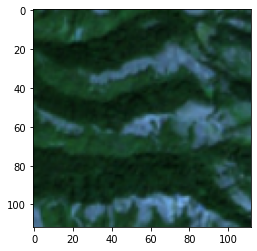

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0.0863, 0.1020, 0.1373,  ..., 0.1333, 0.1804, 0.1804],
         [0.0902, 0.0941, 0.1020,  ..., 0.1098, 0.1608, 0.1804],
         [0.1020, 0.1020, 0.0902,  ..., 0.0784, 0.1059, 0.1176],
         ...,
         [0.2784, 0.2745, 0.2863,  ..., 0.0118, 0.0196, 0.0235],
         [0.2902, 0.2941, 0.2902,  ..., 0.0353, 0.0353, 0.0353],
         [0.3059, 0.3059, 0.2902,  ..., 0.0471, 0.0431, 0.0431]],

        [[0.2588, 0.2784, 0.3216,  ..., 0.2863, 0.3255, 0.3216],
         [0.2627, 0.2706, 0.2745,  ..., 0.2392, 0.2902, 0.3098],
         [0.2745, 0.2627, 0.2353,  ..., 0.1843, 0.2078, 0.2196],
         ...,
         [0.4196, 0.4157, 0.4314,  ..., 0.0941, 0.0941, 0.0863],
         [0.4353, 0.4353, 0.4392,  ..., 0.1255, 0.1137, 0.1020],
         [0.4627, 0.4549, 0.4431,  ..., 0.1490, 0.1333, 0.1294]],

        [[0.1294, 0.1529, 0.2157,  ..., 0.2431, 0.3059, 0.3059],
         [0.1333, 0.1451, 0.1686,  ..., 0.1961, 0.2667, 0.2941],
         [0.1451, 0.1373, 0.1294,  ..., 0.1412, 0.1765, 0.

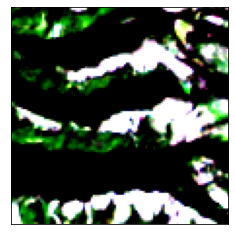

In [5]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

i = 1200
jpg = Image.open("jpg_images/"+rndm_dirs[i]+dot_jpg)
print(np.array(jpg).shape)
# im1 = jpg.crop((left, top, right, bottom))
newsize = (112, 112)
im1 = jpg.resize(newsize)
print(np.array(im1).shape)
print(torch.from_numpy(np.array(im1)))
plt.imshow(np.array(im1))
plt.show()
# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
#     transforms.Normalize(mean, std)
])
# transform the pIL image to tensor 
# image
img_tr = transform(im1)
# calculate mean and std
print(img_tr)
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

# define custom transform function
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
# print(img_tr)
img_tr = transform2(im1)

img_np = np.array(img_tr)
  
# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_np.transpose(1, 2, 0)
  
# display the normalized image
plt.imshow(img_normalized)
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
# shuffled set of random directories
rndm_dirs = np.load("rndm_dir.npy")
tenk = rndm_dirs[:10000]
print(tenk[:2])
print(len(tenk))
y = np.load("np_labels.npy",allow_pickle=True)
print(y[:2])
print(len(y))

['S2A_MSIL2A_20171221T112501_84_49' 'S2A_MSIL2A_20171221T112501_3_4']
10000
[array(['Vineyards', 'Olive groves', 'Agro-forestry areas',
       'Transitional woodland/shrub', 'Water bodies'], dtype='<U27')
 array(['Discontinuous urban fabric', 'Complex cultivation patterns',
       'Land principally occupied by agriculture, with significant areas of natural vegetation',
       'Broad-leaved forest', 'Coniferous forest', 'Mixed forest',
       'Transitional woodland/shrub'], dtype='<U86')]
10000


In [7]:
l = []
for i in y:
    for j in i:
        l.append(j)
li = l.copy()
l = sorted(l)
l = np.array(l)
uni = np.unique(l)
print(uni.shape)
# uni = uni.sort()
print(uni)

(43,)
['Agro-forestry areas' 'Airports'
 'Annual crops associated with permanent crops' 'Bare rock'
 'Beaches, dunes, sands' 'Broad-leaved forest' 'Burnt areas'
 'Coastal lagoons' 'Complex cultivation patterns' 'Coniferous forest'
 'Construction sites' 'Continuous urban fabric'
 'Discontinuous urban fabric' 'Dump sites' 'Estuaries'
 'Fruit trees and berry plantations' 'Green urban areas'
 'Industrial or commercial units' 'Inland marshes' 'Intertidal flats'
 'Land principally occupied by agriculture, with significant areas of natural vegetation'
 'Mineral extraction sites' 'Mixed forest' 'Moors and heathland'
 'Natural grassland' 'Non-irrigated arable land' 'Olive groves' 'Pastures'
 'Peatbogs' 'Permanently irrigated land' 'Port areas' 'Rice fields'
 'Road and rail networks and associated land' 'Salines' 'Salt marshes'
 'Sclerophyllous vegetation' 'Sea and ocean' 'Sparsely vegetated areas'
 'Sport and leisure facilities' 'Transitional woodland/shrub' 'Vineyards'
 'Water bodies' 'Water c

In [8]:
f_list = []
for i in y:
    i_list = np.zeros(43)
    for j in i:
        if j in uni:
            idx = np.where(uni == j)
            i_list[idx] = 1
    f_list.append(i_list)
f_list = np.array(f_list)
print(y[-3])
print(f_list[-3])

['Sea and ocean']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set, y_train, y_test = train_test_split(tenk, f_list, test_size=0.2)

In [10]:
from PIL import Image

mean=[0.1935, 0.2611, 0.2164]
std=[0.1949, 0.1717, 0.1809]

train_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
])
 
test_transform =transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean,std),
])
 



class ImageDataset(Dataset):
    def __init__(self,Images,labels,img_folder,transform):
        self.transform=transform
        self.img_folder=img_folder
        self.image_names=Images
        self.labels=labels

    #The __len__ function returns the number of samples in our dataset.
    def __len__(self):
        return len(self.image_names)


    def __getitem__(self,index):
        image = Image.open(self.img_folder+self.image_names[index]+'.jpg')
        newsize = (112, 112)
        image = image.resize(newsize)
        image = self.transform(image)
        targets=torch.from_numpy(self.labels[idx].ravel())
#         .ravel()
#         .reshape(-1,1)

#         sample = {'image': image,'labels':targets}

        return image, targets

img_folder = "jpg_images/"
train_dataset=ImageDataset(train_set,y_train,img_folder,train_transform)
test_dataset=ImageDataset(test_set,y_test,img_folder,test_transform)

In [11]:
train_dl = DataLoader(
    train_dataset, 
    batch_size=128,
    shuffle=True
)
 
test_dl = DataLoader(
    test_dataset, 
    batch_size=128,
    shuffle=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)


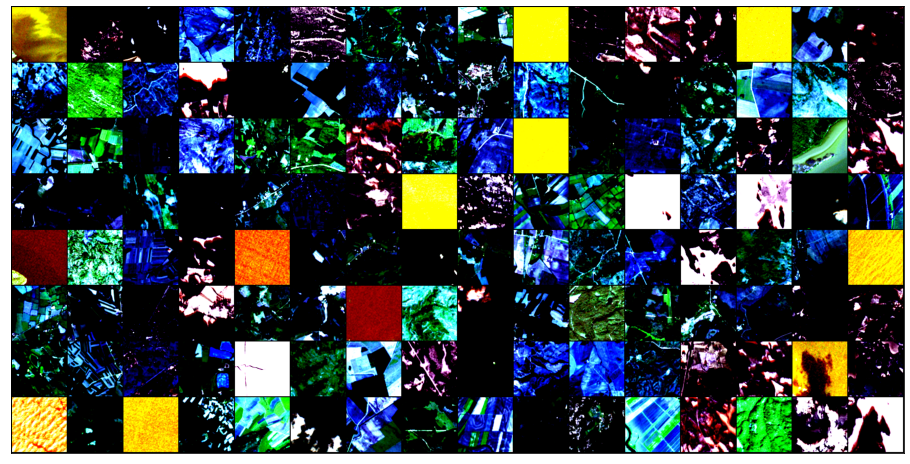

In [12]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        print(labels)
        break


show_batch(train_dl)

In [13]:
from sklearn.metrics import hamming_loss
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
hamming_loss(y_true, y_pred)

0.25

In [14]:
test1 = y_train[0:128]
test2 = y_train[128:256]
# print(test1)
# print(type(test2))
hamming_loss(test1, test2)

0.10955668604651163

In [15]:
op = [[-0.3584,  0.3563, -0.4308,  0.3011, -0.7915, -0.1220, -0.8985,  0.0053,
          0.2009, -0.0446,  0.2737, -0.4603,  0.7363,  1.0597,  0.8121,  0.0519,
          0.5265, -0.8993,  0.6154, -1.3274,  0.0468,  0.4461, -0.2856,  0.1116,
         -0.1986,  0.2851, -1.1574, -0.0284, -0.0336, -0.9451, -0.0511,  0.0717,
          0.0277,  0.4630,  0.0535, -0.0467,  0.3222,  0.1469,  0.0954, -0.2320,
         -0.2322,  1.7434, -0.3346],
        [-0.0159,  0.0315, -0.4523,  0.3597, -0.0956,  0.0183,  0.2601, -0.0125,
          0.6624, -0.0850, -0.6545, -0.6990, -0.0637, -0.0062,  0.5765, -0.9418,
          0.0360, -0.9116,  0.6659, -0.3967,  0.7651, -0.0531,  0.3492, -0.4688,
          0.4121,  0.3066, -1.3589, -0.8284, -0.4178, -0.1143, -0.2084,  0.5743,
          0.7340,  0.3777,  1.1875,  0.4143,  0.2443, -0.1885,  0.4443,  0.1344,
         -0.3848,  1.1297, -0.4943],
        [-0.3879,  0.3634, -1.7016,  0.1396, -0.2956, -0.0564,  0.0666,  0.8396,
          1.4770, -1.6862,  0.4347, -0.5309,  1.1794, -0.8870,  1.2279, -1.4133,
          0.3215, -1.1762,  1.5941, -1.7271,  1.2688,  0.2037,  0.0851, -0.1332,
          0.5917, -0.2250, -1.6143, -1.6480,  0.5909, -0.7133,  0.1369,  0.4165,
          0.3652,  1.6924,  1.6156,  0.7264,  1.2620, -0.1911,  0.9064,  0.4901,
         -0.3037,  1.9810, -1.0097],
        [ 0.0094, -0.0888, -0.4688,  0.3850, -0.3562,  0.2135,  0.5761,  0.0209,
          0.0899,  0.1020, -1.1845, -0.9851,  0.9619, -0.0735,  0.6422, -0.6835,
         -0.1644, -0.9603,  0.6636, -0.1297,  0.2763,  0.3228, -0.2175,  0.2175,
          0.0069,  0.4773, -1.0563, -0.8089,  0.0435, -1.0042, -0.2553,  0.3410,
          0.8659,  0.9212,  0.6292,  0.3217, -0.2893, -0.3440,  0.5774,  0.5053,
          0.0585,  1.1129, -0.7826]]
op = np.array(op)
op = torch.from_numpy(op)
# print(op)
op = torch.sigmoid(op)
print(op)


tensor([[0.4113, 0.5881, 0.3939, 0.5747, 0.3118, 0.4695, 0.2894, 0.5013, 0.5501,
         0.4889, 0.5680, 0.3869, 0.6762, 0.7426, 0.6926, 0.5130, 0.6287, 0.2892,
         0.6492, 0.2096, 0.5117, 0.6097, 0.4291, 0.5279, 0.4505, 0.5708, 0.2391,
         0.4929, 0.4916, 0.2799, 0.4872, 0.5179, 0.5069, 0.6137, 0.5134, 0.4883,
         0.5799, 0.5367, 0.5238, 0.4423, 0.4422, 0.8511, 0.4171],
        [0.4960, 0.5079, 0.3888, 0.5890, 0.4761, 0.5046, 0.5647, 0.4969, 0.6598,
         0.4788, 0.3420, 0.3320, 0.4841, 0.4985, 0.6403, 0.2805, 0.5090, 0.2867,
         0.6606, 0.4021, 0.6825, 0.4867, 0.5864, 0.3849, 0.6016, 0.5761, 0.2044,
         0.3040, 0.3970, 0.4715, 0.4481, 0.6398, 0.6757, 0.5933, 0.7663, 0.6021,
         0.5608, 0.4530, 0.6093, 0.5335, 0.4050, 0.7558, 0.3789],
        [0.4042, 0.5899, 0.1543, 0.5348, 0.4266, 0.4859, 0.5166, 0.6984, 0.8141,
         0.1563, 0.6070, 0.3703, 0.7648, 0.2917, 0.7735, 0.1957, 0.5797, 0.2357,
         0.8312, 0.1510, 0.7805, 0.5507, 0.5213, 0.4667, 0

In [16]:
def one_or_zero(ops):
    onezero = []
    for i in ops:
        oz = torch.zeros(43)
        for j in range(len(i)):
            if j >= 0.5:
                oz[j] = 1
        onezero.append(oz)
#     onezero = np.array(onezero)
    onezero = torch.stack(onezero)
    return onezero
print(one_or_zero(op))

tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])


In [17]:
test2 = torch.from_numpy(y_train[0:4])
print(test2)
print(type(test2))
print(test2.shape)
print(one_or_zero(op)[0])
print(type(one_or_zero(op)[0]))
print(one_or_zero(op)[0].shape)

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.]], dtype=torch.float64)
<class 'torch.Tensor'>
torch.Size([4, 43])
tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [18]:
test2 = torch.from_numpy(y_train[0:4])
test1 = one_or_zero(op)
print(test2)
print(one_or_zero(op))
hm = hamming_loss(test1, test2)
print(hm)
print(type(hm))
hm = torch.as_tensor(hm)
print(hm)
print(type(hm))

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.,

In [19]:
from torchmetrics import HammingDistance
target = torch.tensor([[0, 1], [1, 1]])
preds = torch.tensor([[0, 1], [0, 1]])
hamming_distance = HammingDistance()
hamming_distance(preds, target)

tensor(0.2500)

In [20]:
hamming_distance(test1, test2.int())

tensor(0.9128)

In [21]:
test2 = torch.from_numpy(y_train[0:4])
test1 = torch.from_numpy(y_train[4:8])
def Hamming_Loss(y_true, y_pred):
    temp=0
    for i in range(y_true.shape[0]):
        print("np size",np.size(y_true[i] == y_pred[i]))
#         print(y_true[i] == y_pred[i])
        print("np count",np.count_nonzero(y_true[i] == y_pred[i]))
        temp += np.size(y_true[i] == y_pred[i]) - np.count_nonzero(y_true[i] == y_pred[i])
        print("temp",temp)
    print("output",temp/(y_true.shape[0] * y_true.shape[1]))
    return temp/(y_true.shape[0] * y_true.shape[1])

print(Hamming_Loss(np.array(test1), np.array(test2)))

np size 43
np count 37
temp 6
np size 43
np count 39
temp 10
np size 43
np count 42
temp 11
np size 43
np count 40
temp 14
output 0.08139534883720931
0.08139534883720931


In [22]:
hamming_distance(test1, test2.int())

tensor(0.0814)

In [23]:
from torch.autograd import Variable
test2 = torch.from_numpy(y_train[0:4])
test1 = one_or_zero(op)
def Hamming_Loss(y_true, y_pred):
#     temp=torch.tensor(0, dtype=torch.float, requires_grad=True)
    temp = 0
    for i in range(y_true.shape[0]):
#         print(np.size(y_true[i] == y_pred[i]))
        temp = temp + 43 - torch.count_nonzero(y_true[i] == y_pred[i])
    temp = temp/(y_true.shape[0] * y_true.shape[1])
    return temp

# def Hamming_Loss(nn.Module):
#     def __init__(self, weight=None, size_average=True):
#         super(Hamming_Loss, self).__init__()
    
#     def forward(self, inputs, targets, smooth=1):        
        
#         inputs = F.sigmoid(inputs)       
        
#         inputs = inputs.view(-1)
#         targets = targets.view(-1)
        
#         intersection = (inputs * targets).sum()                            
#         dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
#         return 1 - dice

# Hamming_Loss(test1, test2)

In [24]:
def ham(preds,targets):
    batch_size = torch.as_tensor(preds.shape[0]).float()
    num_labels = torch.as_tensor(preds.shape[1]).float()
    print(batch_size)
    print(num_labels)
#     pred = torch.sigmoid(preds)
#     pred = (pred > 0.5).float()
    xor = (torch.logical_xor(preds,targets).float().sum())/(batch_size*num_labels)
    return xor


In [25]:
m = nn.Sigmoid()
input = torch.randn(2)
print(input)
output = m(input)
print(output)

tensor([-2.5808,  0.1626])
tensor([0.0704, 0.5406])


In [ ]:
model = models.resnet18(pretrained=True)
# model = model.cuda() if device else net
# model.to(device)
print(model)

In [ ]:
num_ftrs = model.fc.in_features
num_ftrs

In [ ]:
model.fc = nn.Linear(num_ftrs,43)
print(model)

In [37]:
num_epochs  = 3
lr = 0.001
criterion = nn.MultiLabelSoftMarginLoss()


def cross_entropy(y_hat, y):
    loss = -(np.sum(y * np.log(y_hat)))
    return loss

lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
n_total_steps = len(train_dl)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dl):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels = labels
        # Forward pass
        outputs = model(images)
#         outputs = torch.sigmoid(outputs)
#         outputs = one_or_zero(outputs)
        loss = criterion(outputs,labels)
#         loss = torch.as_tensor(loss)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')


Epoch [1/3], Step [1/63], Loss: 0.4433
Epoch [1/3], Step [2/63], Loss: 0.4449
Epoch [1/3], Step [3/63], Loss: 0.4416
Epoch [1/3], Step [4/63], Loss: 0.4411
Epoch [1/3], Step [5/63], Loss: 0.4401
Epoch [1/3], Step [6/63], Loss: 0.4392
Epoch [1/3], Step [7/63], Loss: 0.4363
Epoch [1/3], Step [8/63], Loss: 0.4365
Epoch [1/3], Step [9/63], Loss: 0.4360
Epoch [1/3], Step [10/63], Loss: 0.4340
Epoch [1/3], Step [11/63], Loss: 0.4340
Epoch [1/3], Step [12/63], Loss: 0.4328
Epoch [1/3], Step [13/63], Loss: 0.4302
Epoch [1/3], Step [14/63], Loss: 0.4303
Epoch [1/3], Step [15/63], Loss: 0.4280
Epoch [1/3], Step [16/63], Loss: 0.4299
Epoch [1/3], Step [17/63], Loss: 0.4286
Epoch [1/3], Step [18/63], Loss: 0.4275
Epoch [1/3], Step [19/63], Loss: 0.4264
Epoch [1/3], Step [20/63], Loss: 0.4261
Epoch [1/3], Step [21/63], Loss: 0.4232
Epoch [1/3], Step [22/63], Loss: 0.4203
Epoch [1/3], Step [23/63], Loss: 0.4217
Epoch [1/3], Step [24/63], Loss: 0.4249
Epoch [1/3], Step [25/63], Loss: 0.4221
Epoch [1/

In [38]:
PATH = 'models/first.pth'
torch.save(model.state_dict(), PATH)

In [31]:
num_epochs  = 3
lr = 0.001
criterion = nn.MultiLabelSoftMarginLoss()


def cross_entropy(y_hat, y):
    loss = -(np.sum(y * np.log(y_hat)))
    return loss

lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
sigmoid = nn.Sigmoid()
n_total_steps = len(train_dl)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dl):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels = labels
        # Forward pass
        outputs = model(images)
        outputs = sigmoid(outputs)
#         outputs = torch.sigmoid(outputs)
#         outputs = one_or_zero(outputs)
        loss = criterion(outputs,labels)
#         loss = torch.as_tensor(loss)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')


Epoch [1/3], Step [1/63], Loss: 0.9216
Epoch [1/3], Step [2/63], Loss: 0.9217
Epoch [1/3], Step [3/63], Loss: 0.9212
Epoch [1/3], Step [4/63], Loss: 0.9213
Epoch [1/3], Step [5/63], Loss: 0.9206
Epoch [1/3], Step [6/63], Loss: 0.9205
Epoch [1/3], Step [7/63], Loss: 0.9205
Epoch [1/3], Step [8/63], Loss: 0.9204
Epoch [1/3], Step [9/63], Loss: 0.9204
Epoch [1/3], Step [10/63], Loss: 0.9201
Epoch [1/3], Step [11/63], Loss: 0.9198
Epoch [1/3], Step [12/63], Loss: 0.9204
Epoch [1/3], Step [13/63], Loss: 0.9198
Epoch [1/3], Step [14/63], Loss: 0.9192
Epoch [1/3], Step [15/63], Loss: 0.9193
Epoch [1/3], Step [16/63], Loss: 0.9190
Epoch [1/3], Step [17/63], Loss: 0.9192
Epoch [1/3], Step [18/63], Loss: 0.9190
Epoch [1/3], Step [19/63], Loss: 0.9190
Epoch [1/3], Step [20/63], Loss: 0.9182
Epoch [1/3], Step [21/63], Loss: 0.9182
Epoch [1/3], Step [22/63], Loss: 0.9183
Epoch [1/3], Step [23/63], Loss: 0.9187
Epoch [1/3], Step [24/63], Loss: 0.9178
Epoch [1/3], Step [25/63], Loss: 0.9179
Epoch [1/

In [32]:
PATH = 'models/first_sigmoid.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# /var/folders/1x/z6nv8q995s97ztxhb53s8qgh0000gp/T/ipykernel_3471/3279041033.py in <module>
#      20 #         outputs = torch.sigmoid(outputs)
#      21 #         outputs = one_or_zero(outputs)
# ---> 22         loss = ham(outputs,labels)
#      23 #         loss = torch.as_tensor(loss)
#      24         # Backward and optimize

# /var/folders/1x/z6nv8q995s97ztxhb53s8qgh0000gp/T/ipykernel_3471/1804509374.py in ham(preds, targets)
#       6 #     pred = torch.sigmoid(preds)
#       7 #     pred = (pred > 0.5).float()
# ----> 8     xor = (torch.logical_xor(preds,targets).float().sum())/(batch_size*num_labels)
#       9     return xor

# RuntimeError: logical_xor(): functions with out=... arguments don't support automatic differentiation, but one of the arguments requires grad.


In [ ]:
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# /var/folders/1x/z6nv8q995s97ztxhb53s8qgh0000gp/T/ipykernel_3471/3279041033.py in <module>
#      24         # Backward and optimize
#      25         optimizer.zero_grad()
# ---> 26         loss.backward()
#      27         optimizer.step()
#      28 

# /opt/anaconda3/envs/Pytorch_tf/lib/python3.9/site-packages/torch/_tensor.py in backward(self, gradient, retain_graph, create_graph, inputs)
#     253                 create_graph=create_graph,
#     254                 inputs=inputs)
# --> 255         torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
#     256 
#     257     def register_hook(self, hook):

# /opt/anaconda3/envs/Pytorch_tf/lib/python3.9/site-packages/torch/autograd/__init__.py in backward(tensors, grad_tensors, retain_graph, create_graph, grad_variables, inputs)
#     145         retain_graph = create_graph
#     146 
# --> 147     Variable._execution_engine.run_backward(
#     148         tensors, grad_tensors_, retain_graph, create_graph, inputs,
#     149         allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag

# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn


In [80]:
loss

0.8837209302325582

In [80]:
print(labels)
print(outputs2)
loss = Hamming_Loss(labels,outputs2)
print(loss)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
tensor([[0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.]])
tensor(0.8837, grad_fn=<DivBackward0>)


In [27]:
model = models.resnet18(pretrained=True)
# model = model.cuda() if device else net
# model.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
num_ftrs = model.fc.in_features
num_ftrs

512

In [29]:
model.fc = nn.Linear(num_ftrs,43)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [35]:
# Hyper-parameters
num_epochs = 5
batch_size = 1
learning_rate = 0.001

In [ ]:
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_dataloader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images
        labels = labels
#         .ravel()

        # Forward pass
        outputs = model(images)
        outputs = torch.sigmoid(outputs)
#         outputs = outputs.ravel()
#         outputs = nn.Sigmoid(outputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 2000 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')